In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_X = np.random.randn(50, 2)
data_Y = np.where((data_X[:, 1] - data_X[:, 0])>0, 1, 0).reshape(50, 1)

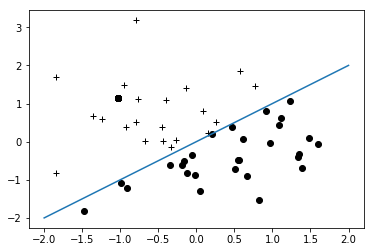

In [3]:
pos = np.where(data_Y==1)
neg = np.where(data_Y==0)
plt.plot(data_X[pos, 0], data_X[pos, 1], 'k+')
plt.plot(data_X[neg, 0], data_X[neg, 1], 'ko')
plt.plot([-2, 2], [-2, 2])
plt.show()

In [4]:
W = tf.Variable([[-.1], [.1]], dtype=tf.float32)
b = tf.Variable([0], dtype=tf.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [5]:
def model(W, b, X):
    return tf.sigmoid(tf.matmul(X, W) + b)

In [6]:
Y_hat = model(W, b, X)
# J = tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y)
J = tf.reduce_mean(-Y*tf.log(Y_hat) - (1-Y)*tf.log(1-Y_hat))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(J)

In [7]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        sess.run(train_step, {X: data_X, Y: data_Y})
        #print(sess.run(J, {X: data_X, Y:data_Y}))
    
    print(np.mean(data_Y == (sess.run(Y_hat, {X: data_X})>0.5)))

0.96
